# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Project Explanation
My goal of this project is to determine which plan brings in more revenue. 
#### Important
    * Each individual call is rounded up even if 1 second
    * Total month of web traffic is rounded up to the nearest gigabyte
- I plan on cleaning the data and prepareing it for proper analyzation. 
- After the data is prepared, I will first round the revenue to the proper amount according to the usuage of the plan. 
- From there I will analyze the data based on location, dates used, and other parameters that i may find useful. 
- After such I will determine which plan brings in more revenue as a whole, while also looking at if plans are more effective with certain paramter criteria that could bring in more revenue.

#### Progress 
Early Focus: Python Fundamentals & Logic Building
* Started with basic Python syntax, focusing on data analysis and logic building.
* Worked through data cleaning, handling missing values, and organizing datasets.
* Faced challenges with syntax and pseudocode development, preferring step-by-step logical processes.

Project-Based Learning Approach
* Completed a movie & TV show analysis project, reinforcing data manipulation, grouping, and trend analysis.
* Began another similar structured project to deepen data exploration skills in Jupyter Notebook.
* Developed skills in handling CSV and Excel files, performing data validation, and using Pandas functions effectively.

Mathematical & Statistical Learning
* Shifted focus to probability and statistics, covering:
    Descriptive statistics (mean, median, mode, variance, standard deviation).
* Probability distributions (binomial and normal).
* Law of Large Numbers & Central Limit Theorem.
* Sampling methods and hypothesis testing (t-tests, significance levels).

Purpose of Study
* To continue my practice in cleaning of data.
* Preparing data for more advanced aggregation. 
* Covering plotting and statistical anlysis.

## Initialization

In [11]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

Above are the libraries I need to complete my task.

## Load data

In [14]:
# Load the data files into different DataFrames
megaline_callsDF = pd.read_csv('megaline_calls.csv')
megaline_internetDF = pd.read_csv('megaline_internet.csv')
megaline_messagesDF = pd.read_csv('megaline_messages.csv')
megaline_plansDF = pd.read_csv('megaline_plans.csv')
megaline_usersDF = pd.read_csv('megaline_users.csv')

Above are the dataframes being imported to be analyzed.

In [16]:
def analyze_data(data):
    print(data.head())
    print('--------------------------------------------')
    print(data.info())
    print('--------------------------------------------')
    print('Potential Duplicates')
    print(' ')
    print(data.duplicated().sum())
    print('--------------------------------------------')
    print('Potential Missing Data')
    print(' ')
    print(data.isna().sum())

This is a custom function so all the important parts of a dataframe area able to be seen with cleaner code.

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [21]:
# Print the general/summary information about the plans' DataFrame
analyze_data(megaline_plansDF)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_mi

In [22]:
# Print a sample of data for plans
megaline_plansDF.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Megaline_Plans Description
megaline_plans has 2 entries with 8 columns. Each column describes what each plan offers for what price. This dataframe shows the differences between the two plans. No issues were found with this dataframe.

## Fix data

[Fix obvious issues with the data given the initial observations.]

No issues seen.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

No additional factors.

## Users

In [33]:
# Print the general/summary information about the users' DataFrame
analyze_data(megaline_usersDF)


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-nul

In [34]:
# Print a sample of data for users
print(megaline_usersDF.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Megaline_users Description
megaline_users has 500 entries with 8 columns and no missing values except for the churn_date column. reg_date and churn_date columns have incorrect data types and churn_date column has NaN values.
- reg_date and churn_date will be changed to datetime datatype.
- Churn_date NaN values will be changed to NaT

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [40]:
megaline_usersDF['reg_date'] = pd.to_datetime(megaline_usersDF['reg_date'], format='%Y-%m-%d')
megaline_usersDF['churn_date'] = pd.to_datetime(megaline_usersDF['churn_date'], format= '%Y-%m-%d')

Columns reg_date and churn_date are converted to datetime datatype.

In [42]:
analyze_data(megaline_usersDF)

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate        NaT  
1 2018-08-13      surf        NaT  
2 2018-10-21      surf        NaT  
3 2018-01-28      surf        NaT  
4 2018-05-23      surf        NaT  
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first

Confirming the changes made.

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

No additional factors added.

## Calls

In [48]:
# Print the general/summary information about the calls' DataFrame
analyze_data(megaline_callsDF)


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
--------------------------------------------
Potential Duplicates
 
0
--------------------------------------------
Potential Missing Data
 
id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [49]:
# Print a sample of data for calls
megaline_callsDF.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Megaline_calls Description
megaline_calls has 137,735 entries with no missing values and has 4 columns. the call_date column has an incorrect data type. I also notice the plan is not included for each user. Each call needs to be rounded up to the next minute, changing the duration column to int. The dates should be in ascending order.
- Change the call_date data type to datetime.
- Add the plan for each user.
- round up each call if float
- change duration column to int
- Update the dates to be in ascending order

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [55]:
megaline_callsDF['call_date'] = pd.to_datetime(megaline_callsDF['call_date'], format='%Y-%m-%d')

Changing the call_date column to datetime datatype.

In [57]:
megaline_callsDF['duration'] = np.ceil(megaline_callsDF['duration'])

Rounding the duration up to the next whole number for each individual call. 

In [59]:
megaline_callsDF.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


Confirmation for the duration column to be rounded up to the next whole number.

In [61]:
megaline_callsDF['duration'] = megaline_callsDF['duration'].astype(int)

Now that every call has been rounded up to a whole number, the data type is changed from float to int.

In [63]:
megaline_callsDF = megaline_callsDF.sort_values(by=['user_id', 'call_date'], ascending=[True, True])

Making sure the data is sorted from the earliest date to the latest in ascending order.

In [65]:
analyze_data(megaline_callsDF)

          id  user_id  call_date  duration
9   1000_544     1000 2018-12-26         5
14  1000_826     1000 2018-12-26        10
0    1000_93     1000 2018-12-27         9
1   1000_145     1000 2018-12-27        14
2   1000_247     1000 2018-12-27        15
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 137735 entries, 9 to 137709
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 4.7+ MB
None
--------------------------------------------
Potential Duplicates
 
0
--------------------------------------------
Potential Missing Data
 
id           0
user_id      0
call_date    0
duration     0
dtype: int64


Confirming the changes made and everything is completed properly.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

I believe adding the plan for each user would be important.

In [70]:
megaline_callsDF = megaline_callsDF.merge(megaline_usersDF[['user_id', 'plan']], on='user_id', how='left')
analyze_data(megaline_callsDF)

         id  user_id  call_date  duration      plan
0  1000_544     1000 2018-12-26         5  ultimate
1  1000_826     1000 2018-12-26        10  ultimate
2   1000_93     1000 2018-12-27         9  ultimate
3  1000_145     1000 2018-12-27        14  ultimate
4  1000_247     1000 2018-12-27        15  ultimate
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
 4   plan       137735 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 4.7+ MB
None
--------------------------------------------
Potential Duplicates
 
0
-------------------------------------------

Plan for each user has been added and confirming the change made is correct.

## Messages

In [73]:
# Print the general/summary information about the messages' DataFrame
analyze_data(megaline_messagesDF)


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
--------------------------------------------
Potential Duplicates
 
0
--------------------------------------------
Potential Missing Data
 
id              0
user_id         0
message_date    0
dtype: int64


In [74]:
# Print a sample of data for messages
megaline_messagesDF.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Megaline_messages Description
Megaline_messages has 76,051 entries with no missing values and has 3 columns. The message_date column has an incorrect data type of object and the dates are out of order. I also notice the plan for each user is not included.
- change message_date column to datetime data type
- organize dates for each user from least to greatest
- add the plan for each user

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [80]:
megaline_messagesDF['message_date'] = pd.to_datetime(megaline_messagesDF['message_date'], format='%Y-%m-%d')

Column message_date has been changed to datetime datatype.

In [82]:
megaline_messagesDF = megaline_messagesDF.sort_values(by=['user_id', 'message_date'], ascending=[True, True])
analyze_data(megaline_messagesDF)

          id  user_id message_date
10  1000_567     1000   2018-12-25
4   1000_255     1000   2018-12-26
0   1000_125     1000   2018-12-27
3   1000_251     1000   2018-12-27
8   1000_502     1000   2018-12-27
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 76051 entries, 10 to 76048
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB
None
--------------------------------------------
Potential Duplicates
 
0
--------------------------------------------
Potential Missing Data
 
id              0
user_id         0
message_date    0
dtype: int64


Column message_date has been organized from earliest to latest in ascending order and confirming the changes made are correct.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [86]:
megaline_messagesDF = megaline_messagesDF.merge(megaline_usersDF[['user_id', 'plan']], on='user_id', how='left')
print(megaline_messagesDF.head())

         id  user_id message_date      plan
0  1000_567     1000   2018-12-25  ultimate
1  1000_255     1000   2018-12-26  ultimate
2  1000_125     1000   2018-12-27  ultimate
3  1000_251     1000   2018-12-27  ultimate
4  1000_502     1000   2018-12-27  ultimate


Plan added to the dataframe and confirming the change made.

## Internet

In [89]:
# Print the general/summary information about the internet DataFrame
analyze_data(megaline_internetDF)


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
--------------------------------------------
Potential Duplicates
 
0
--------------------------------------------
Potential Missing Data
 
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [90]:
# Print a sample of data for the internet traffic
megaline_internetDF.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Megaline_internet Description
megaline_internet has 104,825 entries with no missing values and has 4 columns. Session_date column has an incorrect data type and the session_date column is out of order. I also notice the plan is not inlcuded for each user.
- Change the session_date data type from object to datetime
- Organize the session_date in ascending order for each user
- add the plan for each user

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [96]:
megaline_internetDF['session_date'] = pd.to_datetime(megaline_internetDF['session_date'], format='%Y-%m-%d')

Changing the session_date column to datetime datatype.

In [98]:
megaline_internetDF = megaline_internetDF.sort_values(by=['user_id', 'session_date'], ascending= True)
analyze_data(megaline_internetDF)

         id  user_id session_date  mb_used
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
2  1000_379     1000   2018-12-28   660.40
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 104825 entries, 3 to 104667
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB
None
--------------------------------------------
Potential Duplicates
 
0
--------------------------------------------
Potential Missing Data
 
id              0
user_id         0
session_date    0
mb_use

Organizing the dates in ascending order from earliest to latest and confrimng the datetime change as well as the dates being in ascending order.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [102]:
megaline_internetDF = megaline_internetDF.merge(megaline_usersDF[['user_id', 'plan']], on='user_id', how='left')

Adding the plans to the dataframe.

In [104]:
megaline_internetDF.head()

,id,user_id,session_date,mb_used,plan
0,1000_413,1000,2018-12-26,270.99,ultimate
1,1000_442,1000,2018-12-27,880.22,ultimate
2,1000_379,1000,2018-12-28,660.40,ultimate
3,1000_13,1000,2018-12-29,89.86,ultimate
4,1000_204,1000,2018-12-31,0.00,ultimate


Confirming the change made.

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [108]:
# Print out the plan conditions and make sure they are clear for you
analyze_data(megaline_plansDF)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_mi

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [110]:
def user_usage_per_month(df, user_col, date_col, usage_col, activity_name):
    df['month'] = df[date_col].dt.to_period('M')
    aggregated_df = df.groupby([user_col, 'month'])[usage_col].sum().reset_index(name=f'{activity_name}_count')
    return aggregated_df

This function was created to get the total usuage for each user per month, it will be used for call duration, and mb used.

In [112]:
# Calculate the number of calls made by each user per month. Save the result.
megaline_callsDF['month'] = megaline_callsDF['call_date'].dt.to_period('M')

Creating a month column for each user, which will be used to count the number of calls per month.

In [114]:
megaline_callsDF.head()

,id,user_id,call_date,duration,plan,month
0,1000_544,1000,2018-12-26,5,ultimate,2018-12
1,1000_826,1000,2018-12-26,10,ultimate,2018-12
2,1000_93,1000,2018-12-27,9,ultimate,2018-12
3,1000_145,1000,2018-12-27,14,ultimate,2018-12
4,1000_247,1000,2018-12-27,15,ultimate,2018-12


Confirming the change made.

In [116]:
calls_per_month = megaline_callsDF.groupby(['user_id', 'month']).size().reset_index(name='call_count')
calls_per_month.head()

,user_id,month,call_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


Created a new dataframe that has the total amount of calls made by each user per month.

In [118]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = user_usage_per_month(megaline_callsDF, 'user_id', 'call_date', 'duration', 'total_minutes')

Using the function I created, the total call duration for each user per month will be calculated.

In [120]:
minutes_per_month.head()

,user_id,month,total_minutes_count
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


Confirming the change made is correct.

In [122]:
# Calculate the number of messages sent by each user per month. Save the result.
megaline_messagesDF['month'] = megaline_messagesDF['message_date'].dt.to_period('M') 


Adding a month column to organize each user per month.

In [124]:
messages_per_month = megaline_messagesDF.groupby(['user_id', 'month']).size().reset_index(name='message_count')

Creating a new dataframe that has the total messages per month for each user.

In [126]:
messages_per_month.head()

,user_id,month,message_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


Confirming the change made is correct.

In [128]:
megaline_internetDF.head()

,id,user_id,session_date,mb_used,plan
0,1000_413,1000,2018-12-26,270.99,ultimate
1,1000_442,1000,2018-12-27,880.22,ultimate
2,1000_379,1000,2018-12-28,660.40,ultimate
3,1000_13,1000,2018-12-29,89.86,ultimate
4,1000_204,1000,2018-12-31,0.00,ultimate


In [129]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_per_month = user_usage_per_month(megaline_internetDF, 'user_id', 'session_date', 'mb_used', 'mb')


Created a new dataframe using the custom function to calculate the total amount of mb used for each user per month.

In [131]:
internet_per_month.head()

,user_id,month,mb_count
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


Confirming the changes made are correct.

In [133]:
internet_per_month['mb_count'] = np.ceil(internet_per_month['mb_count'] / 1024) * 1024

mb_count has been updated to nearest 1,024th interval for gb convertion later on.

In [135]:
internet_per_month.head()

,user_id,month,mb_count
0,1000,2018-12,2048.0
1,1001,2018-08,7168.0
2,1001,2018-09,14336.0
3,1001,2018-10,22528.0
4,1001,2018-11,19456.0


Confirming mb_count change.

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [138]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = calls_per_month.merge(minutes_per_month,on=['user_id', 'month'], how='outer')


Created a new dataframe for the aggreagated data to be added to, and merged the new dataframe with calls_per_month dataframe.

In [140]:
merged_df = merged_df.merge(messages_per_month, on=['user_id', 'month'], how='outer')

Adding the message_count to the new dataframe.

In [142]:
merged_df = merged_df.merge(internet_per_month, on=['user_id', 'month'], how='outer')

Adding the mb used to the new dataframe.

In [144]:
analyze_data(merged_df)

   user_id    month  call_count  total_minutes_count  message_count  mb_count
0     1000  2018-12        16.0                124.0           11.0    2048.0
1     1001  2018-08        27.0                182.0           30.0    7168.0
2     1001  2018-09        49.0                315.0           44.0   14336.0
3     1001  2018-10        65.0                393.0           53.0   22528.0
4     1001  2018-11        64.0                426.0           36.0   19456.0
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   user_id              2293 non-null   int64    
 1   month                2293 non-null   period[M]
 2   call_count           2258 non-null   float64  
 3   total_minutes_count  2258 non-null   float64  
 4   message_count        1806 non-null   float64  
 5   mb_count    

Confirming that the new dataframe has everything merged together while checking the datatype and if there are any missing values.

In [146]:
merged_df.rename(columns={'total_minutes_count' : 'minutes_count'}, inplace=True)

I wanted to remove the total part and keep all column names consistant.

In [148]:
analyze_data(merged_df)

   user_id    month  call_count  minutes_count  message_count  mb_count
0     1000  2018-12        16.0          124.0           11.0    2048.0
1     1001  2018-08        27.0          182.0           30.0    7168.0
2     1001  2018-09        49.0          315.0           44.0   14336.0
3     1001  2018-10        65.0          393.0           53.0   22528.0
4     1001  2018-11        64.0          426.0           36.0   19456.0
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   user_id        2293 non-null   int64    
 1   month          2293 non-null   period[M]
 2   call_count     2258 non-null   float64  
 3   minutes_count  2258 non-null   float64  
 4   message_count  1806 non-null   float64  
 5   mb_count       2277 non-null   float64  
dtypes: float64(4), int64(1), period[M](1)
memory

Confriming the column name change.

In [150]:
merged_df.fillna(0, inplace=True)

Filling all missing values with 0 because the columns with missing values are number columns and if its missing than the user used 0 data for that column of that month.

In [152]:
merged_df = merged_df.astype({'call_count' : int, 'minutes_count' : int, 'message_count' : int, 'mb_count' : int})

changing the call_count, minute_count, message_count, and mb_count columns to int because these columns are whole numbers.

In [154]:
analyze_data(merged_df)

   user_id    month  call_count  minutes_count  message_count  mb_count
0     1000  2018-12          16            124             11      2048
1     1001  2018-08          27            182             30      7168
2     1001  2018-09          49            315             44     14336
3     1001  2018-10          65            393             53     22528
4     1001  2018-11          64            426             36     19456
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   user_id        2293 non-null   int64    
 1   month          2293 non-null   period[M]
 2   call_count     2293 non-null   int32    
 3   minutes_count  2293 non-null   int32    
 4   message_count  2293 non-null   int32    
 5   mb_count       2293 non-null   int32    
dtypes: int32(4), int64(1), period[M](1)
memory u

Confirming that the columns have the correct datatype and that there are no missing values.

In [156]:
# Add the plan information
merged_df = merged_df.merge(megaline_usersDF[['user_id', 'plan']], on='user_id', how='left')

Adding the plan for each user from the users dataframe.

In [158]:
analyze_data(merged_df)

   user_id    month  call_count  minutes_count  message_count  mb_count  \
0     1000  2018-12          16            124             11      2048   
1     1001  2018-08          27            182             30      7168   
2     1001  2018-09          49            315             44     14336   
3     1001  2018-10          65            393             53     22528   
4     1001  2018-11          64            426             36     19456   

       plan  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   user_id        2293 non-null   int64    
 1   month          2293 non-null   period[M]
 2   call_count     2293 non-null   int32    
 3   minutes_count  2293 non-null   int32    
 4   message_count  2293 non-null   in

Final confirmation to see that the plans have been added accoringly and that the new dataframe has no issues.

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [161]:
megaline_plansDF.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Looking at the plans dataframe to determine what to do, such as which columns to merge and how the revenue is going to calculated. The plan is to make a new dataframe to get the revenue by merging the all the columns from plans dataframe and aliging the apropriate plan prices for each user.

In [163]:
merged_df.rename(columns={'plan' : 'plan_name'}, inplace=True)

Changing the merged_df plan column name to the same name as the one in the plans dataframe for proper merging.

In [165]:
merged_df.head()

,user_id,month,call_count,minutes_count,message_count,mb_count,plan_name
0,1000,2018-12,16,124,11,2048,ultimate
1,1001,2018-08,27,182,30,7168,surf
2,1001,2018-09,49,315,44,14336,surf
3,1001,2018-10,65,393,53,22528,surf
4,1001,2018-11,64,426,36,19456,surf


Confirming the column name change was successful.

In [167]:
# Calculate the monthly revenue for each user
merged_df_agg = merged_df.merge(megaline_plansDF, on='plan_name', how='outer')

Created a new dataframe for the revenue calculations and adding the plan price for each users plan per month of usage.

In [169]:
merged_df_agg.head()

,user_id,month,call_count,minutes_count,message_count,mb_count,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1001,2018-08,27,182,30,7168,surf,50,15360,500,20,10,0.03,0.03
1,1001,2018-09,49,315,44,14336,surf,50,15360,500,20,10,0.03,0.03
2,1001,2018-10,65,393,53,22528,surf,50,15360,500,20,10,0.03,0.03
3,1001,2018-11,64,426,36,19456,surf,50,15360,500,20,10,0.03,0.03
4,1001,2018-12,56,412,44,19456,surf,50,15360,500,20,10,0.03,0.03


Confirming the new dataframe has all the appropriate columns from plans dataframe in the right places per users plan.

In [171]:
merged_df_agg['minutes_diff'] = merged_df_agg['minutes_count'] - merged_df_agg['minutes_included']
merged_df_agg['messages_diff'] = merged_df_agg['message_count'] - merged_df_agg['messages_included']
merged_df_agg['mb_diff'] = merged_df_agg['mb_count'] - merged_df_agg['mb_per_month_included'] 

Created 3 new columns to see if users went over their monthly limit. If users didn't go over their limit the resulting number will be negative per column, and if the user did go over their limit they will be charged accordlingly.

In [173]:
merged_df_agg.head()

,user_id,month,call_count,minutes_count,message_count,mb_count,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_diff,messages_diff,mb_diff
0,1001,2018-08,27,182,30,7168,surf,50,15360,500,20,10,0.03,0.03,-318,-20,-8192
1,1001,2018-09,49,315,44,14336,surf,50,15360,500,20,10,0.03,0.03,-185,-6,-1024
2,1001,2018-10,65,393,53,22528,surf,50,15360,500,20,10,0.03,0.03,-107,3,7168
3,1001,2018-11,64,426,36,19456,surf,50,15360,500,20,10,0.03,0.03,-74,-14,4096
4,1001,2018-12,56,412,44,19456,surf,50,15360,500,20,10,0.03,0.03,-88,-6,4096


Confirming the columns were aggregated successfuly.

In [175]:
merged_df_agg[['minutes_diff', 'messages_diff', 'mb_diff']] = merged_df_agg[['minutes_diff', 'messages_diff', 'mb_diff']].clip(lower=0)

To get the revenue I plan on multiplying the columns of used data by their counter column of price per data over limit columns, and there can't be negative numbers so for each of the diff columns any value that has a negative number will be converted to 0. Since each column with a negative number will be 0, when the usage columns are multiplyed by their counter columns the result will be 0 and that user will not be charged, since they didnt go over there limit for that data. 

In [177]:
merged_df_agg.head()

,user_id,month,call_count,minutes_count,message_count,mb_count,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_diff,messages_diff,mb_diff
0,1001,2018-08,27,182,30,7168,surf,50,15360,500,20,10,0.03,0.03,0,0,0
1,1001,2018-09,49,315,44,14336,surf,50,15360,500,20,10,0.03,0.03,0,0,0
2,1001,2018-10,65,393,53,22528,surf,50,15360,500,20,10,0.03,0.03,0,3,7168
3,1001,2018-11,64,426,36,19456,surf,50,15360,500,20,10,0.03,0.03,0,0,4096
4,1001,2018-12,56,412,44,19456,surf,50,15360,500,20,10,0.03,0.03,0,0,4096


Confirming all negative number in the diff columns have been changed to 0.

In [179]:
merged_df_agg['revenue'] = merged_df_agg['usd_monthly_pay']

Here the revenue column has been created and is being filled with the users monthly plan price to start.

In [181]:
merged_df_agg['gb_used'] = merged_df_agg['mb_diff'] // 1024

Since each user is being charged by the gb every 1,024 mb is being converted to 1 gb.

In [183]:
merged_df_agg.head()

,user_id,month,call_count,minutes_count,message_count,mb_count,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_diff,messages_diff,mb_diff,revenue,gb_used
0,1001,2018-08,27,182,30,7168,surf,50,15360,500,20,10,0.03,0.03,0,0,0,20,0
1,1001,2018-09,49,315,44,14336,surf,50,15360,500,20,10,0.03,0.03,0,0,0,20,0
2,1001,2018-10,65,393,53,22528,surf,50,15360,500,20,10,0.03,0.03,0,3,7168,20,7
3,1001,2018-11,64,426,36,19456,surf,50,15360,500,20,10,0.03,0.03,0,0,4096,20,4
4,1001,2018-12,56,412,44,19456,surf,50,15360,500,20,10,0.03,0.03,0,0,4096,20,4


Confirming the revenue column has been added with the plan price and the gb column has been added with the correct amount.

In [185]:
merged_df_agg['revenue'] += merged_df_agg['minutes_diff'] * merged_df_agg['usd_per_minute']
merged_df_agg['revenue'] += merged_df_agg['messages_diff'] * merged_df_agg['usd_per_message']
merged_df_agg['revenue'] += merged_df_agg['gb_used'] * merged_df_agg['usd_per_gb']

Here the revenue calculations are being completed by multiplying each diff column to its counterpart of data being used and the result is being added to the revenue column for each user.

In [187]:
analyze_data(merged_df_agg)

   user_id    month  call_count  minutes_count  message_count  mb_count  \
0     1001  2018-08          27            182             30      7168   
1     1001  2018-09          49            315             44     14336   
2     1001  2018-10          65            393             53     22528   
3     1001  2018-11          64            426             36     19456   
4     1001  2018-12          56            412             44     19456   

  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                  15360               500   
1      surf                 50                  15360               500   
2      surf                 50                  15360               500   
3      surf                 50                  15360               500   
4      surf                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  minutes_diff  \
0               2

Confirming that the revnue column is correct and has been aggregated successfuly as well as no missing values or duplicates.

In [189]:
merged_df_agg['revenue']

0       20.00
1       20.00
2       90.09
3       60.00
4       60.00
        ...  
2288    70.00
2289    70.00
2290    70.00
2291    70.00
2292    70.00
Name: revenue, Length: 2293, dtype: float64

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [193]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_calls = merged_df_agg.groupby(['plan_name', 'month'])['minutes_count'].mean().unstack()
avg_calls.head()

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan_name,,,,,,,,,,,,
surf,203.0,297.000000,330.00,351.540000,399.584416,431.298969,449.983471,410.111111,414.226804,429.729958,423.325088,473.836478
ultimate,193.5,403.142857,304.25,336.857143,406.241379,370.957447,427.067797,421.436620,437.511628,450.735849,445.196850,459.099338


Creating a seperate dataframe to compare the average duration of calls per each plan per each month.

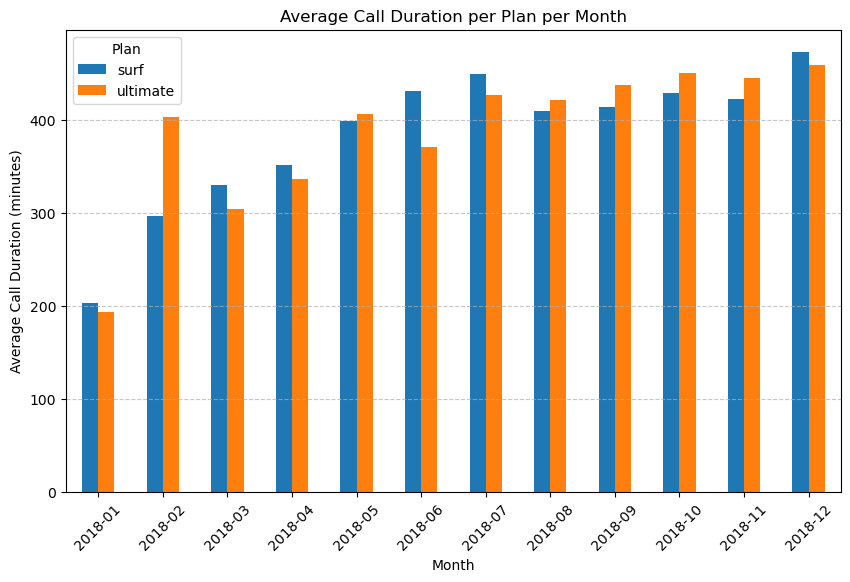

In [195]:
avg_calls.T.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Plan per Month')
plt.legend(title = 'Plan')
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

A bar plot has been created showing the average number of calls users make for each month per plan. Every month has around a similar amount of call duration for each plan. One thing to notice is that not a single user for both plans has exceeded 500 minutes which is whats included for the surf plan. January has the lowest call duration average of the year for each plan. Lowering the surf included minutes to 400 could be an option as most surf users are using between 400 and 500 minutes.

In [197]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
avg_calls_hist = avg_calls.stack()
avg_calls_hist.head()

plan_name  month  
surf       2018-01    203.000000
           2018-02    297.000000
           2018-03    330.000000
           2018-04    351.540000
           2018-05    399.584416
dtype: float64

Stacking the avg_calls dataframe to be ploted easier for histogram and confriming the changes made. I made it a new dataframe because I will be using avg_calls unstacked for other bar charts and the histogram doesnt come out right with this framework.

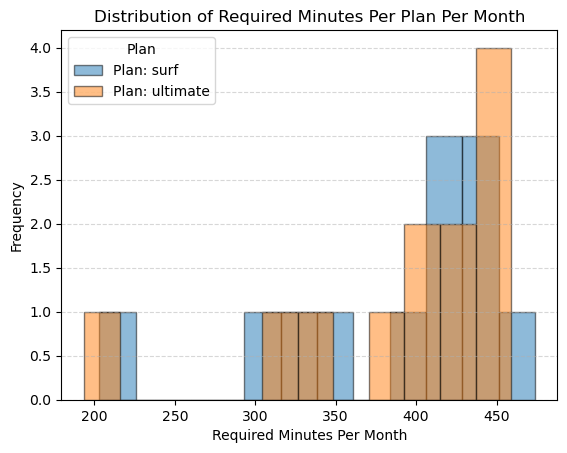

In [199]:
for plan in avg_calls_hist.index.get_level_values(0).unique():
    plt.hist(avg_calls_hist.loc[plan], bins=12, alpha=0.5, label=f'Plan: {plan}', edgecolor='black')

plt.xlabel("Required Minutes Per Month")
plt.ylabel("Frequency")
plt.title("Distribution of Required Minutes Per Plan Per Month")
plt.legend(title="Plan")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

With the histogram ploted it is observed that ultimate users require around 450 calls per month and surf users require between 400 and 450 calls per month.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [202]:
# Calculate the mean and the variance of the monthly call duration
var_calls = merged_df_agg.groupby(['plan_name', 'month'])['minutes_count'].var().unstack()
var_calls


month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan_name,,,,,,,,,,,,
surf,15842.000000,52226.50000,35809.363636,50866.743265,59754.219754,45592.628436,61005.099725,54344.645963,46595.958656,52278.664056,51607.021602,63629.518918
ultimate,16572.333333,76889.47619,61984.931818,34888.928571,43841.046798,42503.563367,72563.374635,53645.506640,57070.464569,54261.910512,60593.222847,62503.783400


Here is the variance of the call duration for each month of users from both plans.

In [204]:
avg_calls

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan_name,,,,,,,,,,,,
surf,203.0,297.000000,330.00,351.540000,399.584416,431.298969,449.983471,410.111111,414.226804,429.729958,423.325088,473.836478
ultimate,193.5,403.142857,304.25,336.857143,406.241379,370.957447,427.067797,421.436620,437.511628,450.735849,445.196850,459.099338


Here is the mean of the call duration for each month of users from both plans.

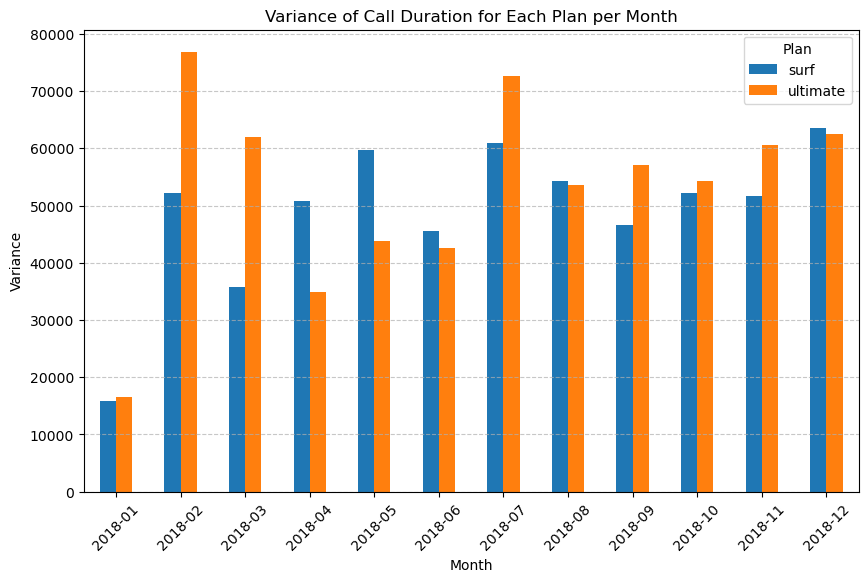

In [206]:
# Plot a boxplot to visualize the distribution of the monthly call duration
var_calls.T.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Month')
plt.ylabel('Variance')
plt.title('Variance of Call Duration for Each Plan per Month')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Here is a box plot showing the variance for both plans.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

Ultimate users tend to have a higher variance for more months out of the year, which means ultimate users are on a single phone call for longer. Longer phone calls could mean that ultimate users are using megaline for a professional setting such as work or buinsess related reasons. Ultimate users may also not worry about hitting their limit whereas surf users may be more cautious about their minute time so they tend to make shorter more predictable calls, maybe for personal use.

### Messages

In [211]:
def bar_plot_stats(df, group_cols, value_cols, agg_func, xlabel, ylabel, title):
    if agg_func == 'mean':
        agg_data = df.groupby(group_cols)[value_cols].mean().unstack()
    elif agg_func == 'var':
        agg_data = df.groupby(group_cols)[value_cols].var().unstack()
    else:
        raise ValueError('Choose mean or var')
        
    agg_data.T.plot(kind='bar', figsize=(10, 6))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title='Plan')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

Function made for bar charts of mean or variance.

In [213]:
def hist_plot_stats(df, group_cols, value_cols, agg_func, xlabel, title):
    if agg_func == 'mean':
        agg_data = df.groupby(group_cols)[value_cols].mean()
    else:
        raise ValueError('Only mean accepted')
        
    for plan in agg_data.index.get_level_values(0).unique():
        plt.hist(agg_data.loc[plan], bins=12, alpha=0.5, label=f'Plan: {plan}', edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend(title="Plan")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.show()

Function for mean being ploted as a histogram.

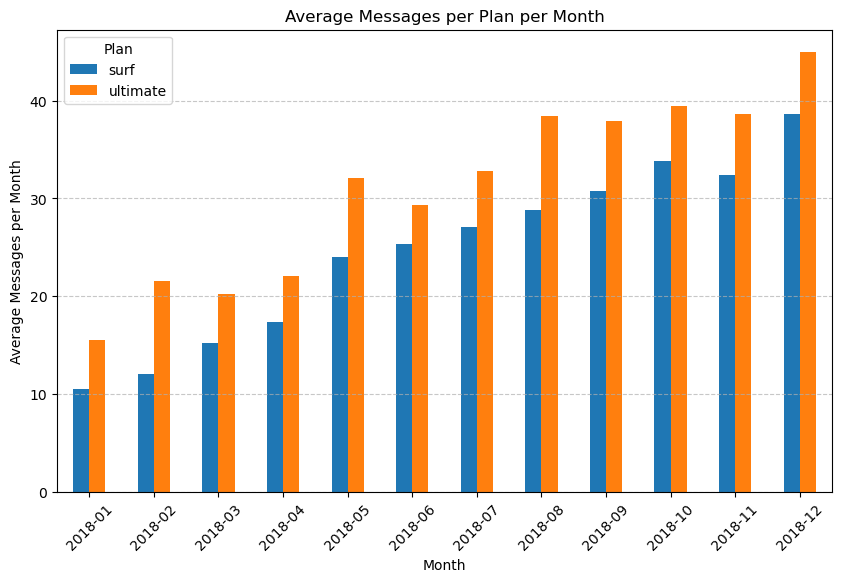

In [215]:
# Compare the number of messages users of each plan tend to send each month
bar_plot_stats(merged_df_agg, ['plan_name', 'month'], 'message_count', 'mean', 'Month', 'Average Messages per Month', 'Average Messages per Plan per Month')


This is a bar plot showing the average messages sent by users from each plan per month.

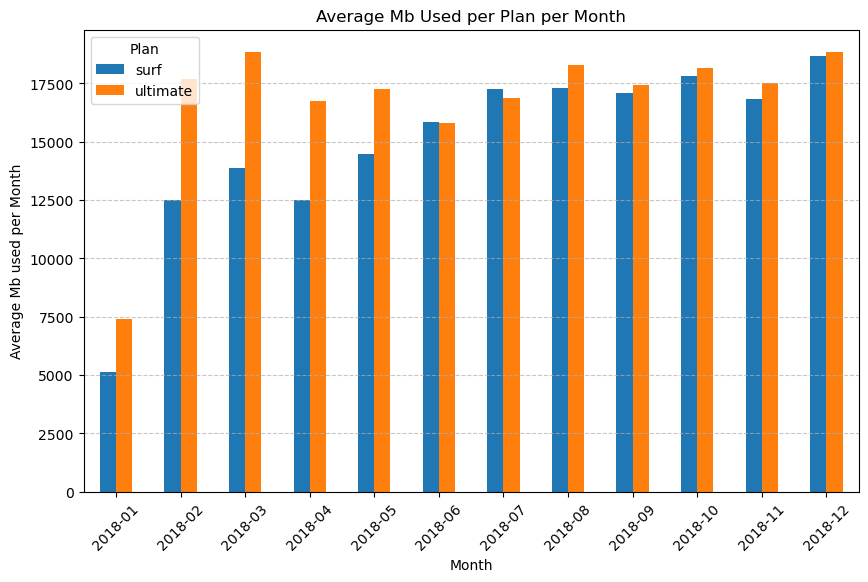

In [217]:
# Compare the amount of internet traffic consumed by users per plan
bar_plot_stats(merged_df_agg, ['plan_name', 'month'], 'mb_count', 'mean', 'Month', 'Average Mb used per Month', 'Average Mb Used per Plan per Month')



Here is a bar plot showing the average internet usuage for users from each plan per month.

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

From the start of the year towards the end, message usage for both plans gradually goes up. By month December users from both plans have trippled their message usage since January. Ultimate users consistantly send more messages per month than surf users.  

### Internet

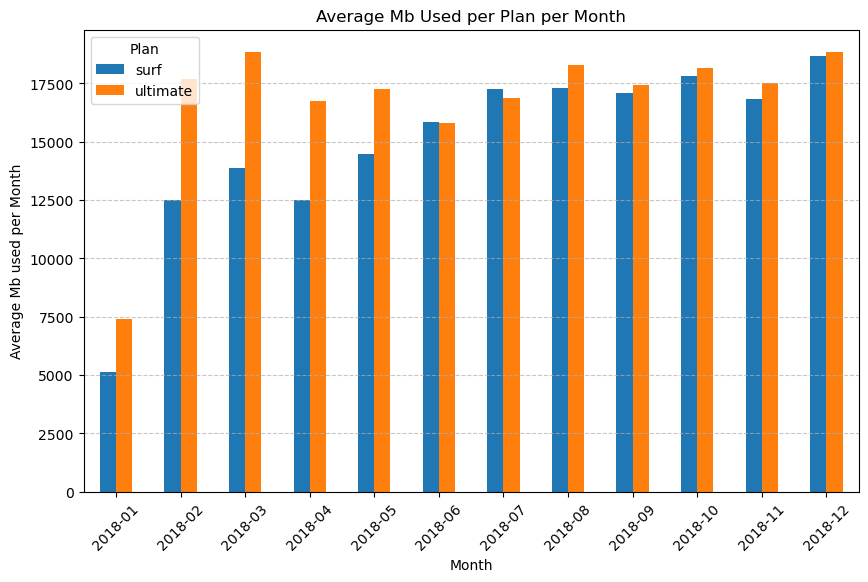

In [223]:
bar_plot_stats(merged_df_agg, ['plan_name', 'month'], 'mb_count', 'mean', 'Month', 'Average Mb used per Month', 'Average Mb Used per Plan per Month')


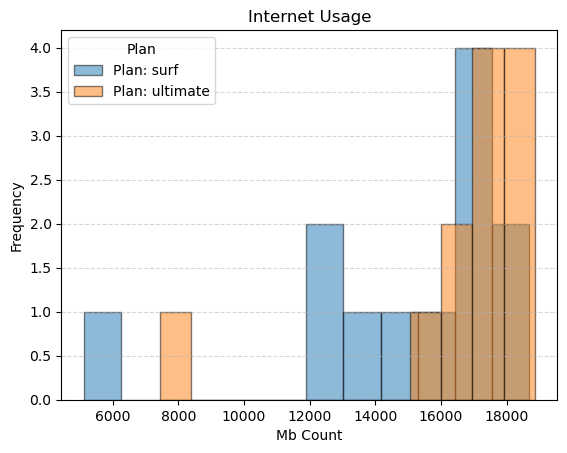

In [224]:
hist_plot_stats(merged_df_agg, ['plan_name', 'month'], 'mb_count', 'mean', 'Mb Count', 'Internet Usage')

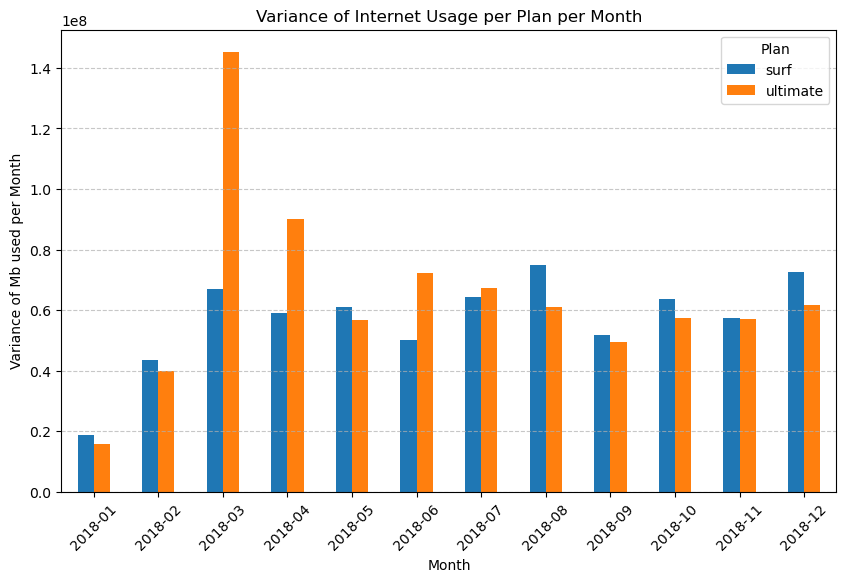

In [225]:
bar_plot_stats(merged_df_agg, ['plan_name', 'month'], 'mb_count', 'var', 'Month', 'Variance of Mb used per Month', 'Variance of Internet Usage per Plan per Month')


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

Ultimate users use much more internet for the first 5 months. Users from both plans tend to use around the same amount. After observing the histogram for internet usage, both plans could require around 16,000 to 19,000 mb for each month. It was also observed that both users typically have similar session time on the internet expect for march, April and June ultimate users had much longer session times.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

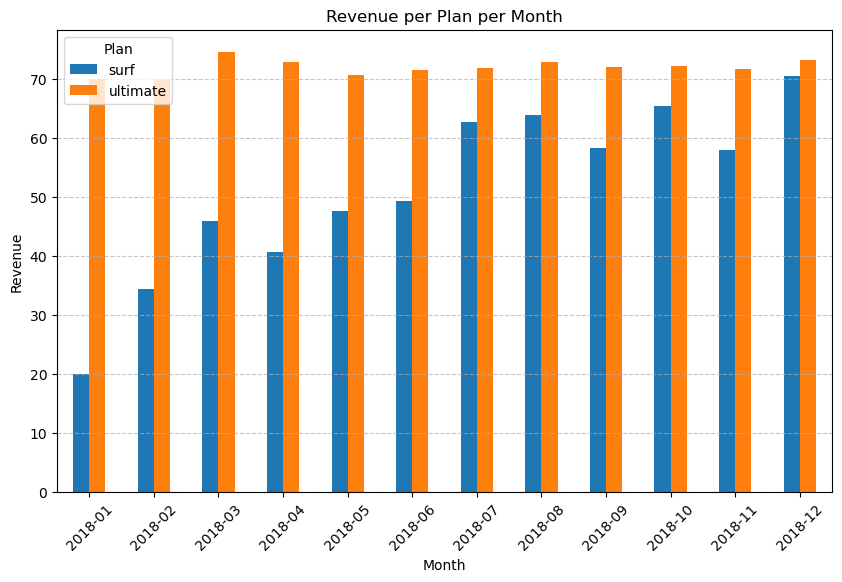

In [231]:
bar_plot_stats(merged_df_agg, ['plan_name', 'month'], 'revenue', 'mean', 'Month', 'Revenue', 'Revenue per Plan per Month')


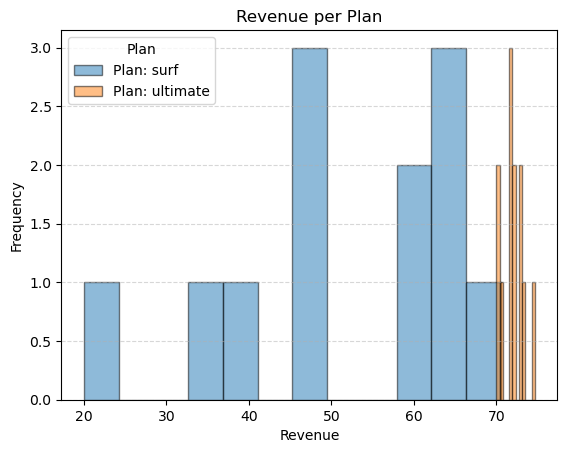

In [232]:
hist_plot_stats(merged_df_agg, ['plan_name', 'month'], 'revenue', 'mean', 'Revenue', 'Revenue per Plan')

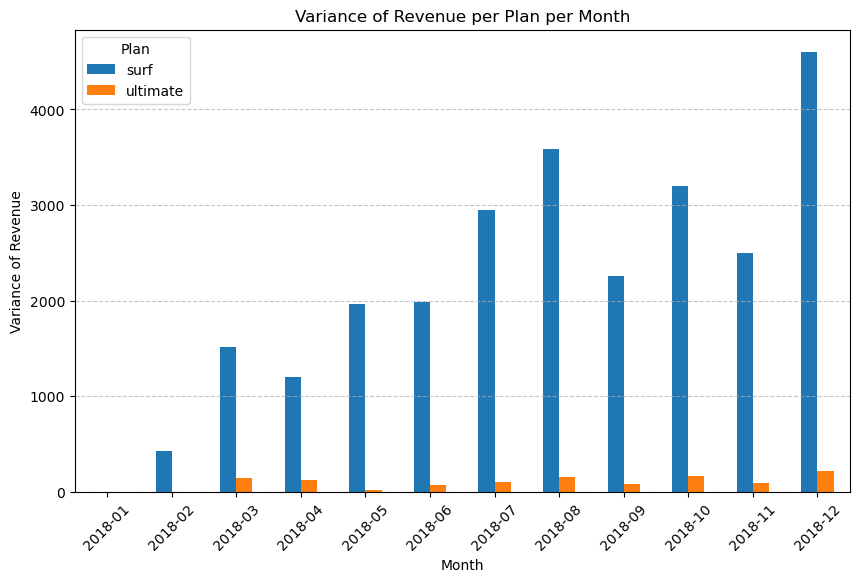

In [233]:
bar_plot_stats(merged_df_agg, ['plan_name', 'month'], 'revenue', 'var', 'Month', 'Variance of Revenue', 'Variance of Revenue per Plan per Month')


[Formulate conclusions about how the revenue differs between the plans.]

Ultimate users tend to bring in more revenue at a much more consistant pace than surf users. Surf user revenue fluctuates drastically and is not consistent. 

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [240]:
# Test the hypotheses
surf_rev = merged_df_agg[merged_df_agg['plan_name'] == 'surf']['revenue']
ultimate_rev = merged_df_agg[merged_df_agg['plan_name'] == 'ultimate']['revenue']


In [241]:
surf_sample = surf_rev.sample(n = 29, random_state=42)
ultimate_sample = ultimate_rev.sample(n = 29, random_state=42)

A sample size of less than 30 of the revenue for each plan has been added to new dataframes.

In [243]:
alpha = 0.05

results = st.ttest_ind(surf_sample, ultimate_sample)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

p-value:  0.5387263836168644
We cant reject the null hypothesis


Since we cant reject the null hypothesis we can determine that the revenue for both plans is around the same, which contradicts the bar plot for monthly revenue for each plan per month.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [247]:
# Test the hypotheses
merged_df_agg = merged_df_agg.merge(megaline_usersDF[['user_id', 'city']], on='user_id', how='outer')
merged_df_agg.head()

,user_id,month,call_count,minutes_count,message_count,mb_count,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_diff,messages_diff,mb_diff,revenue,gb_used,city
0,1000,2018-12,16.0,124.0,11.0,2048.0,ultimate,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,0.0,0.0,0.0,70.00,0.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27.0,182.0,30.0,7168.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,0.0,0.0,0.0,20.00,0.0,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09,49.0,315.0,44.0,14336.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,0.0,0.0,0.0,20.00,0.0,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10,65.0,393.0,53.0,22528.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,0.0,3.0,7168.0,90.09,7.0,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11,64.0,426.0,36.0,19456.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,0.0,0.0,4096.0,60.00,4.0,"Seattle-Tacoma-Bellevue, WA MSA"


Getting the city for each user.

In [249]:
analyze_data(merged_df_agg)

   user_id    month  call_count  minutes_count  message_count  mb_count  \
0     1000  2018-12        16.0          124.0           11.0    2048.0   
1     1001  2018-08        27.0          182.0           30.0    7168.0   
2     1001  2018-09        49.0          315.0           44.0   14336.0   
3     1001  2018-10        65.0          393.0           53.0   22528.0   
4     1001  2018-11        64.0          426.0           36.0   19456.0   

  plan_name  messages_included  mb_per_month_included  minutes_included  \
0  ultimate             1000.0                30720.0            3000.0   
1      surf               50.0                15360.0             500.0   
2      surf               50.0                15360.0             500.0   
3      surf               50.0                15360.0             500.0   
4      surf               50.0                15360.0             500.0   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  minutes_diff  \
0             70.

In [250]:
city_rev = merged_df_agg[['user_id', 'plan_name', 'city', 'revenue']].dropna()
city_rev

,user_id,plan_name,city,revenue
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00
...,...,...,...,...
2298,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",100.00
2299,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",20.00
2300,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",70.00
2301,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",40.00


New dataframe created for the ttest on the specific region and removing any NaN values as only a small sample is needed.

In [252]:
nj_ny_rev = city_rev[city_rev['city'].str.contains(r'\b(NJ|NY)\b')]
nj_ny_rev.head()

C:\Users\mikey\AppData\Local\Temp\ipykernel_101100\1393168070.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  nj_ny_rev = city_rev[city_rev['city'].str.contains(r'\b(NJ|NY)\b')]


,user_id,plan_name,city,revenue
56,1014,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.00
57,1014,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",38.84
75,1022,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.00
76,1022,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",100.00
77,1022,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.00


dataframe for only areas in nj and ny.

In [254]:
other_areas_rev = city_rev[~city_rev['city'].str.contains(r'\b(NJ|NY)\b')]
other_areas_rev.head()

C:\Users\mikey\AppData\Local\Temp\ipykernel_101100\1035420258.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  other_areas_rev = city_rev[~city_rev['city'].str.contains(r'\b(NJ|NY)\b')]


,user_id,plan_name,city,revenue
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00


New dataframe for areas not in NJ or NY.

In [256]:
alpha = 0.05

results = st.ttest_ind(nj_ny_rev['revenue'].sample(n = 29, random_state = 42), other_areas_rev['revenue'].sample(n = 29, random_state = 42))

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

p-value:  0.5091262314321268
We cant reject the null hypothesis


From the results of the ttest we can say that the revenue is not different for these areas.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Reduce surf’s call limit from 500 to 400 minutes (since users rarely exceed it).
Adjust internet pricing for surf users to reduce overage fee spikes, which cause revenue inconsistency.
Keep ultimate plan Unchanged as it brings in steady revenue and users seem satisfied.
Monitor high spending of surf users and target them for ultimate plan upgrades to stabilize revenue.
Further investigate regional differences in NJ/NY, isn’t significantly different in revenue, but behavior trends might exist... 

Im not sure what else to say as of now I would like to see how I did so far on this project as I am tired from working on this.